# Predicting the Success of a Kickstarter Campaign
Part A. Initial exploratory data analysis (EDA).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
%matplotlib inline

from sqlalchemy import create_engine

import datetime
import warnings
import os
import sys

warnings.filterwarnings("ignore") 

In [2]:
sys.executable

'/Users/brianmcmahon/anaconda3/envs/tensorflow1.4/bin/python'

In [3]:
# env variable at tensorflow1.4 per https://conda.io/docs/user-guide/tasks/manage-environments.html#saving-environment-variables
# and https://vsupalov.com/flask-sqlalchemy-postgres/

def get_env_variable(name):
    try:
        return os.environ[name]
    except KeyError:
        message = "Expected environment variable '{}' not set.".format(name)
        raise Exception(message)

# the values of those depend on your setup
POSTGRES_URL = get_env_variable("POSTGRES_URL")
POSTGRES_USER = get_env_variable("POSTGRES_USER")
POSTGRES_PW = get_env_variable("POSTGRES_PW")
POSTGRES_DB = get_env_variable("POSTGRES_DB")

In [4]:
DB_URL = 'postgresql+psycopg2://{user}:{pw}@{url}/{db}'.format(user=POSTGRES_USER,pw=POSTGRES_PW,url=POSTGRES_URL,db=POSTGRES_DB)

In [5]:
engine_var = DB_URL
engine = create_engine(engine_var)

In [6]:
# df = pd.read_pickle('data/kickstarter_data_ds2.pkl')
df = pd.read_sql_query('''SELECT * FROM kickstarter_data_ds2''',engine)
df['idx'] = df['id']
df = df.set_index('idx')
df = df.drop(['index'],1)
print(df.shape)
pd.read_sql_query('''SELECT state, category_main, category_name, backers_count, pct_goal_achieved, usd_pledged, usd_goal, country, currency, campaign_length, staff_pick, blurb_length, launched FROM kickstarter_data_ds2 LIMIT 5''',engine)

(163425, 19)


state   category_main  category_name  backers_count  pct_goal_achieved  \
0      0           games  Playing Cards            131                0.3   
1      1            food    Small Batch             99                1.3   
2      1  film_and_video         Horror             34                1.5   
3      0            food          Farms             49                0.3   
4      1      publishing        Fiction             13                1.0   

   usd_pledged      usd_goal country currency  campaign_length  staff_pick  \
0  3387.000000   9999.000000      US      USD               38           0   
1  9858.000000   7500.000000      US      USD               30           1   
2  4611.000000   3000.000000      US      USD               32           0   
3  4741.000000  18000.000000      US      USD               38           1   
4   427.185132    427.185132      CA      CAD               21           0   

   blurb_length    launched  
0            16  2017-12-05  
1             5  2017-12-13  
2            23  2017-12-11  
3             9  2017-12-05  
4            22  2017-12-22

In [7]:
df.corr().sort_values('state')

id     state  backers_count  pct_goal_achieved  \
campaign_length    0.005133 -0.089709       0.005262          -0.005714   
usd_goal           0.003757 -0.033841       0.014228          -0.000685   
id                 1.000000 -0.003156      -0.001980          -0.001269   
blurb_length       0.000146  0.001104      -0.013996          -0.002498   
pct_goal_achieved -0.001269  0.015741       0.011325           1.000000   
usd_pledged       -0.000468  0.107837       0.810157           0.008084   
backers_count     -0.001980  0.116073       1.000000           0.011325   
staff_pick         0.001558  0.257915       0.152846           0.001501   
state             -0.003156  1.000000       0.116073           0.015741   
spotlight         -0.003156  1.000000       0.116073           0.015741   

                   usd_pledged  usd_goal  campaign_length  staff_pick  \
campaign_length       0.015575  0.024598         1.000000   -0.009770   
usd_goal              0.016147  1.000000         0.024598   -0.005367   
id                   -0.000468  0.003757         0.005133    0.001558   
blurb_length         -0.012055 -0.002520         0.037894   -0.021259   
pct_goal_achieved     0.008084 -0.000685        -0.005714    0.001501   
usd_pledged           1.000000  0.016147         0.015575    0.143184   
backers_count         0.810157  0.014228         0.005262    0.152846   
staff_pick            0.143184 -0.005367        -0.009770    1.000000   
state                 0.107837 -0.033841        -0.089709    0.257915   
spotlight             0.107837 -0.033841        -0.089709    0.257915   

                   spotlight  blurb_length  
campaign_length    -0.089709      0.037894  
usd_goal           -0.033841     -0.002520  
id                 -0.003156      0.000146  
blurb_length        0.001104      1.000000  
pct_goal_achieved   0.015741     -0.002498  
usd_pledged         0.107837     -0.012055  
backers_count       0.116073     -0.013996  
staff_pick          0.257915     -0.021259  
state               1.000000      0.001104  
spotlight           1.000000      0.001104

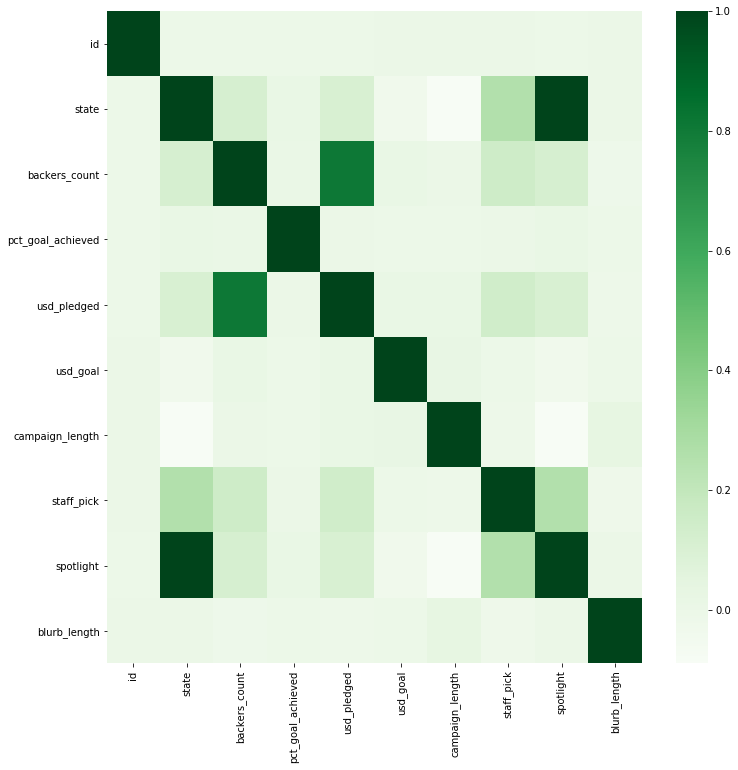

In [9]:
plt.figure(figsize = (12,12))
# sns.heatmap(df.corr(), cmap = 'coolwarm')
sns.heatmap(df.corr(), cmap = "Greens" )
plt.savefig('../charts/featuresheatmap.png')
# plot_corr_matrix(df)
# sns.heatmap(df.corr(),linecolor = "coolwarm")

In [11]:
start_date = datetime.datetime.strptime('2017-06-30', "%Y-%m-%d").date() # reducing datapoints for enhanced performance

df = df[df['launched'] >= start_date] # filter from start date to current
df.shape

(8524, 19)

In [12]:
df.groupby('state').nunique()

id  name  state  category_main  category_name  backers_count  \
state                                                                   
0      3620  3620      1             15            113            174   
1      4904  4902      1             15            135            797   

       pct_goal_achieved  usd_pledged  usd_goal  country  currency  \
state                                                                
0                     11         1966      1314       22        14   
1                    212         4563      2056       22        14   

       campaign_length  deadline  launched  created  staff_pick  spotlight  \
state                                                                        
0                   61       182       178      458           2          1   
1                   60       186       181      512           2          1   

       creator_name  blurb_length  
state                              
0              3535            32  
1              4651            31

In [13]:
# Country Dictionary
country_dict = {}
country_list = ['US', 'CA', 'GB', 'AT', 'HK', 'FR', 'IT', 'NL', 'ES', 'AU', 'BE',
       'MX', 'DE', 'NZ', 'SG', 'SE', 'DK', 'NO', 'IE', 'CH', 'LU', 'JP']#,'Other','All
for country in country_list:
    if country == 'All':
        df_c = df
    elif country == 'Other':
        df_c = df[~df.country.isin(country_list)]
    else:
        df_c = df[df['country'] == country]
    df_c = df_c.dropna()
    state_mean = df_c['state'].mean()
    backers_mean = df_c['backers_count'].mean()
    pledged_mean = df_c['usd_pledged'].mean()
    goal_mean = df_c['usd_goal'].mean()
    campaign_mean = df_c['campaign_length'].mean()
    staff_pick_mean = df_c['staff_pick'].mean()
    blurb_mean = df_c['blurb_length'].mean()

    state_total = df_c['state'].sum()
    backers_total = df_c['backers_count'].sum()
    pledged_total = df_c['usd_pledged'].sum()
    goal_total = df_c['usd_goal'].sum()
    pct_goal_achieved = pledged_total/goal_total
    
    country_dict[country] = {"state_mean":state_mean, "backers_mean": backers_mean, "pledged_mean":pledged_mean, 
                         "goal_mean":goal_mean, "campaign_mean":campaign_mean, "staff_pick_mean":staff_pick_mean, 
                         "blurb_mean":blurb_mean, "state_total": state_total, "backers_total":backers_total,
                            "pledged_total":pledged_total,"goal_total":goal_total,"pct_goal_achieved": pct_goal_achieved}

In [14]:
cd = pd.DataFrame(country_dict).T
cd['country'] = cd.index
cd = cd.sort_values(['pledged_total'],ascending=[False])
cd

backers_mean  backers_total  blurb_mean  campaign_mean      goal_mean  \
US    151.810335       775599.0   18.962419      31.362498   41915.369348   
GB    119.602285       115177.0   18.761163      30.046729   20852.831863   
CA    159.189189        64790.0   18.503686      31.670762   44441.274073   
AU    196.064516        42546.0   18.612903      31.294931   24781.150594   
HK    261.455882        17779.0   18.132353      33.000000   24130.676667   
DE    118.468927        20969.0   17.853107      30.186441   12836.371943   
FR    140.251748        20056.0   18.580420      34.370629   11833.731710   
SE    255.376812        17621.0   18.260870      31.289855  182047.473052   
CH    134.487179         5245.0   17.769231      32.871795   17677.138559   
ES     86.309091         9494.0   18.927273      33.263636   17936.054282   
SG    209.720000        10486.0   15.920000      29.300000   26760.448965   
NL     70.185185         5685.0   18.913580      31.691358   33832.537439   
DK    107.325000         4293.0   19.375000      31.100000   20696.066147   
MX     39.760234         6799.0   18.929825      34.730994    9202.029544   
IT     53.633028         5846.0   16.981651      35.871560  195245.885435   
JP    152.350000         3047.0   13.050000      33.000000   29384.075162   
NZ    121.088889         5449.0   18.800000      32.133333    8221.495131   
AT    257.240000         6431.0   16.600000      34.840000   50725.910758   
BE    139.692308         3632.0   19.153846      36.769231   23704.366672   
IE     96.692308         2514.0   19.500000      29.000000    6416.803368   
LU    161.666667          970.0   15.833333      32.166667   55383.327889   
NO     96.076923         1249.0   19.769231      32.923077    9308.635792   

      goal_total  pct_goal_achieved  pledged_mean  pledged_total  \
US  2.141456e+08           0.374491  15696.928272   8.019561e+07   
GB  2.008128e+07           0.373207   7782.423427   7.494474e+06   
CA  1.808760e+07           0.230673  10251.409880   4.172324e+06   
AU  5.377510e+06           0.614001  15215.649353   3.301796e+06   
HK  1.640886e+06           1.382260  33354.867211   2.268131e+06   
DE  2.272038e+06           0.866158  11118.332370   1.967945e+06   
FR  1.692224e+06           1.007906  11927.283519   1.705602e+06   
SE  1.256128e+07           0.094421  17189.042345   1.186044e+06   
CH  6.894084e+05           1.492952  26391.116907   1.029254e+06   
ES  1.972966e+06           0.519052   9309.737259   1.024071e+06   
SG  1.338022e+06           0.557661  14923.264251   7.461632e+05   
NL  2.740436e+06           0.216848   7336.530940   5.942590e+05   
DK  8.278426e+05           0.625990  12955.533245   5.182213e+05   
MX  1.573547e+06           0.278423   2562.058879   4.381121e+05   
IT  2.128180e+07           0.019506   3808.443629   4.151204e+05   
JP  5.876815e+05           0.637959  18745.830628   3.749166e+05   
NZ  3.699673e+05           0.891776   7331.733567   3.299280e+05   
AT  1.268148e+06           0.257320  13052.783885   3.263196e+05   
BE  6.163135e+05           0.455764  10803.605149   2.808937e+05   
IE  1.668369e+05           1.506804   9668.866889   2.513905e+05   
LU  3.323000e+05           0.682947  37823.866218   2.269432e+05   
NO  1.210123e+05           0.889598   8280.946298   1.076523e+05   

    staff_pick_mean  state_mean  state_total country  
US         0.133098    0.615972       3147.0      US  
GB         0.159917    0.698858        673.0      GB  
CA         0.174447    0.697789        284.0      CA  
AU         0.161290    0.635945        138.0      AU  
HK         0.102941    0.720588         49.0      HK  
DE         0.152542    0.519774         92.0      DE  
FR         0.160839    0.622378         89.0      FR  
SE         0.144928    0.623188         43.0      SE  
CH         0.102564    0.512821         20.0      CH  
ES         0.109091    0.563636         62.0      ES  
SG         0.040000    0.660000         33.0      SG  
NL     

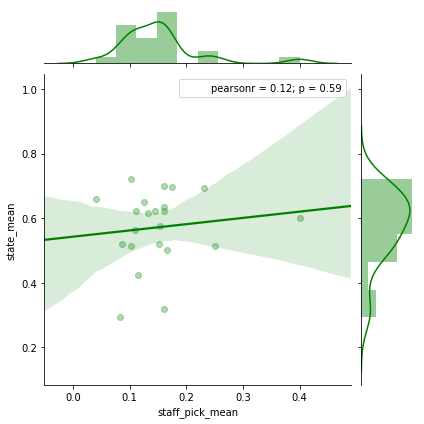

In [15]:
sns.jointplot(x='staff_pick_mean',y='state_mean', kind='reg',color='g',data=cd,scatter_kws={'alpha':0.3})

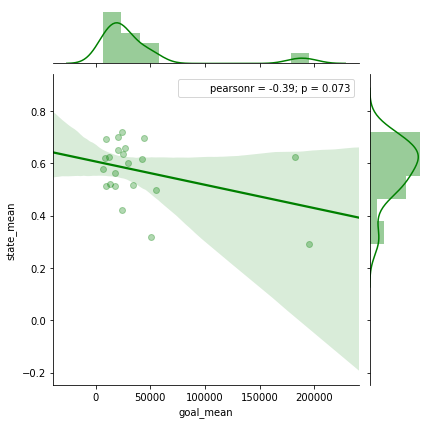

In [16]:
sns.jointplot(x='goal_mean',y='state_mean', kind='reg',color='g',data=cd,scatter_kws={'alpha':0.3})

In [17]:
# Main Category Dictionary
mcat_dict = {}
mcat_list = ['games', 'food', 'film_and_video', 'publishing', 'technology',
       'fashion', 'art', 'comics', 'music', 'crafts', 'dance', 'design',
       'photography', 'theater', 'journalism'] 
for mcat in mcat_list:
    if mcat == 'All':
        df_d = df
    elif mcat == 'Other':
        df_d = df[~df.category_main.isin(mcat_list)]
    else:
        df_d = df[df['category_main'] == mcat]
    df_d = df_d.dropna()
    cat_count = df_d['id'].count()
    state_mean = df_d['state'].mean()
    backers_mean = df_d['backers_count'].mean()
    pledged_mean = df_d['usd_pledged'].mean()
    goal_mean = df_d['usd_goal'].mean()
    campaign_mean = df_d['campaign_length'].mean()
    staff_pick_mean = df_d['staff_pick'].mean()
    blurb_mean = df_d['blurb_length'].mean()

    state_total = df_d['state'].sum()
    backers_total = df_d['backers_count'].sum()
    pledged_total = df_d['usd_pledged'].sum()
    goal_total = df_d['usd_goal'].sum()
    pct_goal_achieved = pledged_total/goal_total
    
    mcat_dict[mcat] = {"state_mean":state_mean, "backers_mean": backers_mean, "pledged_mean":pledged_mean, 
                         "goal_mean":goal_mean, "campaign_mean":campaign_mean, "staff_pick_mean":staff_pick_mean, 
                         "blurb_mean":blurb_mean, "state_total": state_total, "backers_total":backers_total,
                            "pledged_total":pledged_total,"goal_total":goal_total,"pct_goal_achieved": pct_goal_achieved}

In [18]:
mcd = pd.DataFrame(mcat_dict).T
mcd = pd.DataFrame(mcd)
mcd['category'] = mcd.index
mcd = mcd.sort_values(['pledged_total'],ascending=[False])
mcd

backers_mean  backers_total  blurb_mean  campaign_mean  \
technology        376.740167       316085.0   18.323004      34.398093   
games             288.439222       177967.0   18.275527      31.079417   
fashion            96.450363        79668.0   17.261501      29.892252   
publishing        139.916930       133061.0   19.227129      31.089380   
film_and_video     86.711864        71624.0   19.549637      33.529056   
food               82.374286        57662.0   19.431429      33.002857   
comics            174.715221       106751.0   19.382979      30.106383   
art               107.852893        65251.0   17.975207      28.411570   
music              77.438662        41662.0   19.243494      31.855019   
design            117.878049        24165.0   18.341463      29.917073   
crafts             64.301136        22634.0   18.522727      30.161932   
photography        62.980132        19020.0   18.867550      31.258278   
theater            57.318367        14043.0   20.040816      30.387755   
journalism         57.611765         9794.0   19.494118      33.111765   
dance              49.527559         6290.0   19.338583      29.968504   

                    goal_mean    goal_total  pct_goal_achieved  pledged_mean  \
technology       37651.573961  3.158967e+07           1.615410  60822.719199   
games            22263.534611  1.373660e+07           0.608683  13551.440710   
fashion          30027.160398  2.480243e+07           0.332474   9983.256090   
publishing       10574.761026  1.005660e+07           0.785149   8302.760640   
film_and_video  196123.867438  1.619983e+08           0.043986   8626.625726   
food             21522.755169  1.506593e+07           0.348279   7495.914608   
comics            6349.756193  3.879701e+06           1.233579   7832.928895   
art               4976.572785  3.010827e+06           1.521622   7572.460597   
music             8129.461588  4.373650e+06           0.765180   6220.500002   
design           55676.912377  1.141377e+07           0.164008   9131.466013   
crafts            8205.061571  2.888182e+06           0.619519   5083.193788   
photography      11832.275130  3.573347e+06           0.475401   5625.080999   
theater          32339.277692  7.923123e+06           0.190101   6147.744547   
journalism       86347.579297  1.467909e+07           0.059693   5154.323523   
dance             5932.923099  7.534812e+05           0.786362   4665.423464   

                pledged_total  staff_pick_mean  state_mean  state_total  \
technology       5.103026e+07         0.159714    0.589988        495.0   
games            8.361239e+06         0.124797    0.551053        340.0   
fashion          8.246170e+06         0.077482    0.723971        598.0   
publishing       7.895925e+06         0.208202    0.758149        721.0   
film_and_video   7.125593e+06         0.108959    0.501211        414.0   
food             5.247140e+06         0.088571    0.350000        245.0   
comics           4.785920e+06         0.271686    0.829787        507.0   
art              4.581339e+06         0.132231    0.844628        511.0   
music            3.346629e+06         0.089219    0.646840        348.0   
design           1.871951e+06         0.219512    0.512195        105.0   
crafts           1.789284e+06         0.085227    0.502841        177.0   
photography      1.698774e+06         0.175497    0.447020        135.0   
theater          1.506197e+06         0.106122    0.616327        151.0   
journalism       8.762350e+05         0.094118    0.335294         57.0   
dance            5.925088e+05         0.220472    0.787402        100.0   

                      category  
technology          technology  
games                    games  
fashion                fashion  
publishing          publishing  
film_and_video  film_and_video  
food                      food  
comics                  comics  
art                        art  
music                    music  
design             

In [19]:
# Subcategory Dictionary
subcat_dict = {}
subcat_list = ['Playing Cards', 'Small Batch', 'Horror', 'Farms', 'Fiction',
       'Nonfiction', 'Flight', 'Childrenswear', 'Ready-to-wear',
       'Television', 'Web', 'Performance Art', 'Drinks', 'Graphic Novels',
       'Music Videos', 'Hip-Hop', 'Stationery', 'Mixed Media',
       'Food Trucks', 'Comedy', 'Restaurants', 'Electronic Music',
       'Literary Spaces', 'Mobile Games', 'Cookbooks', 'Zines', 'Jazz',
       'Periodicals', 'Jewelry', 'Radio & Podcasts', 'Apps',
       "Children's Books", 'Accessories', 'DIY', 'Candles', 'Apparel',
       'Dance', '3D Printing', 'Illustration', 'Video Art',
       'Graphic Design', 'Anthologies', 'Footwear', 'Photobooks',
       'Fine Art', 'Plays', 'Translations', 'Sound', 'Latin',
       'Architecture', 'Animation', 'Spaces', 'Webseries', 'Nature',
       'Couture', 'Performances', 'Workshops', 'Movie Theaters', 'Audio',
       'World Music', 'Hardware', 'Experimental', 'Gaming Hardware',
       'Narrative Film', 'Crafts', 'Drama', 'Blues', 'Fabrication Tools',
       'Pop', 'Art Books', 'DIY Electronics', 'Pottery', 'Animals',
       'Ceramics', 'Academic', 'Gadgets', 'Wearables', 'Festivals',
       'Public Art', 'Vegan', 'Faith', 'Metal', 'Webcomics', 'Video',
       'Sculpture', 'Romance', 'Interactive Design', 'Fantasy',
       'Classical Music', 'Civic Design', 'Family', 'Live Games',
       'Calendars', 'Comic Books', 'Robots', 'Events', 'Thrillers',
       'Science Fiction', 'Textiles', 'Software', 'Poetry',
       'Installations', 'Camera Equipment', 'Painting', 'People',
       'Space Exploration', 'Print', 'Musical', 'Typography', 'Action',
       'Journalism', 'Immersive', 'R&B', 'Pet Fashion', 'Conceptual Art',
       'Woodworking', 'Young Adult', 'Weaving', 'Photo', 'Letterpress',
       'Puzzles', 'Punk', 'Places', 'Embroidery', "Farmer's Markets",
       'Literary Journals', 'Printing', 'Makerspaces', 'Knitting', 'Kids',
       'Video Games', 'Glass', 'Community Gardens', 'Bacon', 'Crochet',
       'Quilts', 'Residencies'] #'All','Other']
for subcat in subcat_list:
    if subcat == 'All':
        df_c = df
    elif subcat == 'Other':
        df_c = df[~df.category_name.isin(subcat_list)]
    else:
        df_c = df[df['category_name'] == subcat]
    df_c = df_c.dropna()
    main_cat = df_c['category_main'].unique()[0]
    cat_count = df_c['id'].count()
    state_mean = df_c['state'].mean()
    backers_mean = df_c['backers_count'].mean()
    pledged_mean = df_c['usd_pledged'].mean()
    goal_mean = df_c['usd_goal'].mean()
    campaign_mean = df_c['campaign_length'].mean()
    staff_pick_mean = df_c['staff_pick'].mean()
    blurb_mean = df_c['blurb_length'].mean()

    state_total = df_c['state'].sum()
    backers_total = df_c['backers_count'].sum()
    pledged_total = df_c['usd_pledged'].sum()
    goal_total = df_c['usd_goal'].sum()
    pct_goal_achieved = pledged_total/goal_total
    
    subcat_dict[subcat] = {"state_mean":state_mean, "backers_mean": backers_mean, "pledged_mean":pledged_mean, 
                         "goal_mean":goal_mean, "campaign_mean":campaign_mean, "staff_pick_mean":staff_pick_mean, 
                         "blurb_mean":blurb_mean, "state_total": state_total, "backers_total":backers_total,
                            "pledged_total":pledged_total,"goal_total":goal_total,"pct_goal_achieved": pct_goal_achieved}

In [20]:
scd = pd.DataFrame(subcat_dict).T
scd = pd.DataFrame(scd)
scd['cat_name'] = scd.index
scd = scd.sort_values(['pledged_total'],ascending=[False])
scd

backers_mean  backers_total  blurb_mean  campaign_mean  \
Hardware              600.168831        46213.0   18.051948      35.649351   
Wearables             617.750000        61775.0   18.910000      34.700000   
Gadgets               335.869369        74563.0   18.157658      34.914414   
Video Games           910.420168       108340.0   18.252101      30.504202   
Sound                 325.662162        24099.0   18.337838      34.081081   
Apparel               177.901734        30777.0   17.982659      30.653179   
Camera Equipment      392.000000        15680.0   18.250000      33.825000   
3D Printing           196.934783         9059.0   17.956522      33.326087   
Accessories            96.788079        29230.0   16.778146      28.331126   
Fabrication Tools     724.588235        12318.0   19.176471      31.352941   
Robots                211.577778         9521.0   18.044444      36.133333   
Illustration          170.506122        41774.0   16.946939      26.036735   
Playing Cards         168.622517        50924.0   17.811258      29.407285   
Space Exploration     204.380952         4292.0   19.809524      31.047619   
Children's Books      154.074419        33126.0   19.167442      31.525581   
Graphic Novels        189.090452        37629.0   19.613065      31.658291   
Flight               1065.695652        24511.0   19.173913      32.565217   
Art Books             235.366337        23772.0   18.950495      29.831683   
Nonfiction            226.944954        24737.0   19.669725      32.238532   
Drinks                 78.597884        14855.0   19.169312      32.798942   
Animation             144.634146        11860.0   18.207317      35.256098   
Comic Books           131.029412        35640.0   19.863971      29.312500   
Footwear              111.805825        11516.0   16.951456      33.281553   
DIY Electronics       149.791209        13631.0   18.010989      34.857143   
Photobooks             89.649007        13537.0   18.543046      31.827815   
Drama                  92.333333        12742.0   19.673913      32.123188   
Comedy                 68.114130        12533.0   19.945652      32.369565   
Apps                  362.612903        11241.0   18.000000      32.451613   
Webcomics             253.538462        16480.0   18.153846      30.123077   
Crafts                144.206186        13988.0   17.546392      30.536082   
...                          ...            ...         ...            ...   
Puzzles               118.083333         1417.0   19.416667      31.333333   
Pet Fashion            33.900000          339.0   18.500000      28.100000   
R&B                    27.480000          687.0   20.360000      31.720000   
Fantasy                16.952381          356.0   17.047619      36.523810   
Pottery                55.800000          558.0   17.400000      32.700000   
Conceptual Art         19.555556          528.0   17.518519      32.000000   
Typography            132.142857          925.0   18.285714      31.285714   
Farmer's Markets       14.952381          314.0   20.190476      31.761905   
Punk                   43.055556          775.0   17.500000      30.777778   
Makerspaces            28.538462          371.0   19.076923      38.230769   
Quilts                 86.000000          258.0   21.000000      23.333333   
Interactive Design     18.333333          385.0   18.904762      30.619048   
Animals                48.090909          529.0   17.636364      31.909091   
Video Art              31.142857          218.0   21.285714      34.857143   
Textiles               13.375000          214.0   19.812500      30.062500   
Workshops              36.125000          289.0   20.500000      27.125000   
Couture                15.928571          223.0   19.428571      29.357143   
Letterpress            33.666667          202.0   18.166667      29.833333   
Latin                  28.800000          144.0   18.400000      31.600000   
Residencies            42.250000          

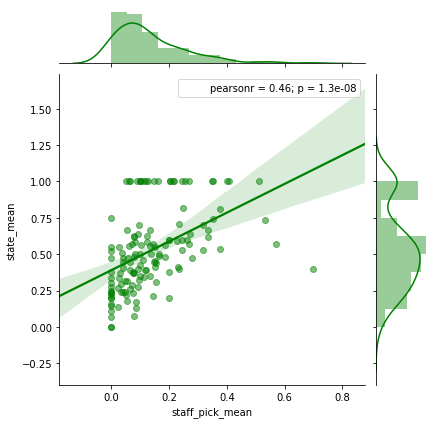

In [23]:
ax = sns.jointplot(x='staff_pick_mean',y='state_mean', kind='reg',color='g',data=scd,scatter_kws={'alpha':0.5})

plt.savefig("../charts/staffpickvssuccess.png")

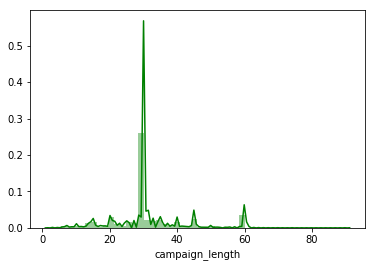

In [24]:
sns.distplot(df['campaign_length'],color='g');

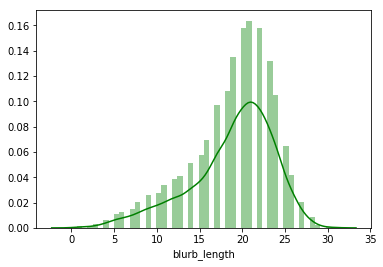

In [25]:
sns.distplot(df['blurb_length'],color='g');

In [26]:
state_dict = {}
state_list = [('Fail',0),('Success',1),('All','All')]

for state in state_list:
    if state[0] == 'All':
        df_c = df
    else:
        df_c = df[df['state'] == state[1]]
    df_c = df_c.dropna()
    state_mean = df_c['state'].mean()
    backers_mean = df_c['backers_count'].mean()
    pledged_mean = df_c['usd_pledged'].mean()
    goal_mean = df_c['usd_goal'].mean()
    campaign_mean = df_c['campaign_length'].mean()
    staff_pick_mean = df_c['staff_pick'].mean()
    blurb_mean = df_c['blurb_length'].mean()
    
    state_total = df_c['state'].sum()
    backers_total = df_c['backers_count'].sum()
    pledged_total = df_c['usd_pledged'].sum()
    goal_total = df_c['usd_goal'].sum()
    pct_goal_achieved = pledged_total/goal_total
    
    state_dict[state[0]] = {"state_mean":state_mean, "backers_mean": backers_mean, "pledged_mean":pledged_mean, 
                         "goal_mean":goal_mean, "campaign_mean":campaign_mean, "staff_pick_mean":staff_pick_mean, 
                         "blurb_mean":blurb_mean, "state_total": state_total, "backers_total":backers_total,
                            "pledged_total":pledged_total,"goal_total":goal_total,"pct_goal_achieved": pct_goal_achieved}

In [27]:
sd = pd.DataFrame(state_dict).T
sd

backers_mean  backers_total  blurb_mean  campaign_mean     goal_mean  \
All        144.765858      1145677.0   18.785823      31.448319  39138.831590   
Fail        17.669767        53186.0   19.065116      33.707309  88527.435465   
Success    222.775489      1092491.0   18.614396      30.061786   8824.863878   

           goal_total  pct_goal_achieved  pledged_mean  pledged_total  \
All      3.097447e+08           0.351758  13767.395239   1.089552e+08   
Fail     2.664676e+08           0.016565   1466.495770   4.414152e+06   
Success  4.327713e+07           2.415618  21317.498705   1.045410e+08   

         staff_pick_mean  state_mean  state_total  
All             0.141142    0.619661       4904.0  
Fail            0.031894    0.000000          0.0  
Success         0.208197    1.000000       4904.0

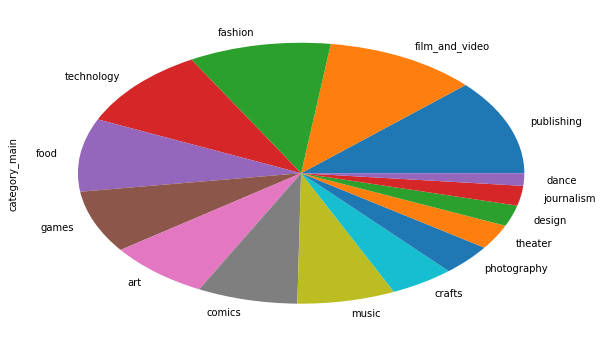

In [28]:
df.category_main.value_counts(normalize = True).plot(kind = 'pie', figsize=(10, 6))
plt.savefig('../charts/mcpie.png')

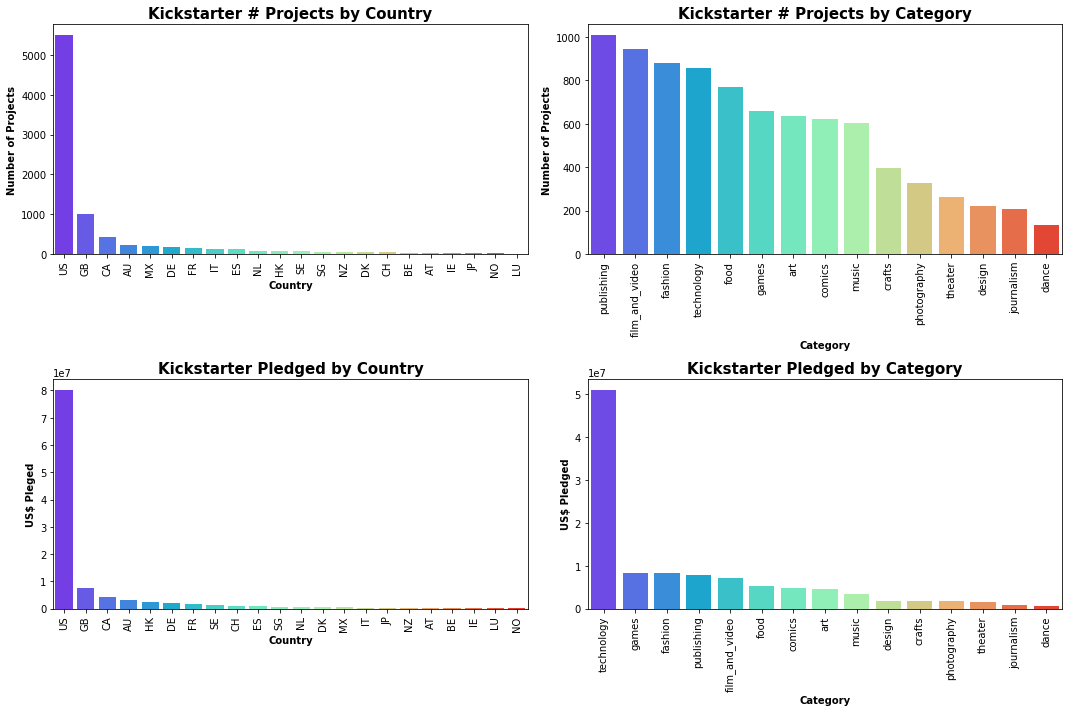

In [30]:
fig,ax = plt.subplots(figsize=(15,10),nrows=2,ncols=2)
ax = plt.subplot(221)
df_1 = df['country'].value_counts()
df_1 = pd.DataFrame(df_1)
df_1 = df_1.rename(columns={'country': 'count'})
df_1['country'] = df_1.index
ax = sns.barplot(x="country",y="count",data=df_1,palette='rainbow')
ax.set_xlabel("Country",fontweight='bold')
ax.set_ylabel("Number of Projects",fontweight='bold')
plt.xticks(rotation=90)
plt.title("Kickstarter # Projects by Country",fontweight='bold',fontsize=15)

ax = plt.subplot(222)
df_2 = df['category_main'].value_counts()
df_2 = pd.DataFrame(df_2)
df_2 = df_2.rename(columns={'category_main': 'count'})
df_2['category_main'] = df_2.index
ax = sns.barplot(x="category_main",y="count",data=df_2,palette='rainbow')
ax.set_xlabel("Category",fontweight='bold')
ax.set_ylabel("Number of Projects",fontweight='bold')
plt.xticks(rotation=90)
plt.title("Kickstarter # Projects by Category",fontweight='bold',fontsize=15)

ax = plt.subplot(223)
ax = sns.barplot(x="country",y="pledged_total",data=cd,palette='rainbow')
ax.set_xlabel("Country",fontweight='bold')
ax.set_ylabel("US$ Pleged",fontweight='bold')
plt.xticks(rotation=90)
plt.title("Kickstarter Pledged by Country",fontweight='bold',fontsize=15)

ax = plt.subplot(224)
ax = sns.barplot(x="category",y="pledged_total",data=mcd,palette='rainbow')
ax.set_xlabel("Category",fontweight='bold')
ax.set_ylabel("US$ Pledged",fontweight='bold')
plt.xticks(rotation=90)
plt.title("Kickstarter Pledged by Category",fontweight='bold',fontsize=15)
plt.tight_layout()
plt.savefig("../charts/totalcountrycategory.png")

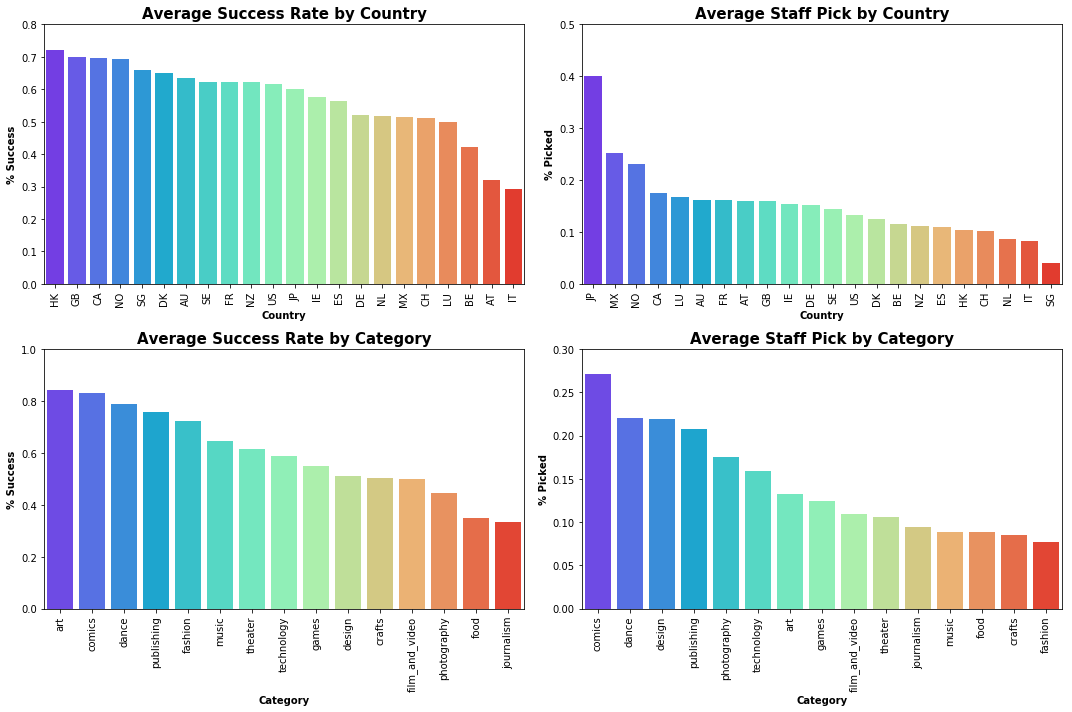

In [31]:
fig,ax = plt.subplots(figsize=(15,10),nrows=2,ncols=2)
ax = plt.subplot(221)

cd_t = cd.sort_values(['state_mean'], ascending=[False])
ax = sns.barplot(x='country',y='state_mean',data=cd_t,palette='rainbow')
ax.set_ylim([0, 0.8]) 
ax.set_xlabel("Country",fontweight='bold')
ax.set_ylabel("% Success",fontweight='bold')
plt.xticks(rotation=90)

plt.title("Average Success Rate by Country",fontweight='bold',fontsize=15)

ax = plt.subplot(222)
cd_u = cd.sort_values(['staff_pick_mean'], ascending=[False])
ax = sns.barplot(x='country',y='staff_pick_mean',data=cd_u,palette='rainbow')
ax.set_ylim([0, 0.5]) 
ax.set_xlabel("Country",fontweight='bold')
ax.set_ylabel("% Picked",fontweight='bold')
plt.xticks(rotation=90)

plt.title("Average Staff Pick by Country",fontweight='bold',fontsize=15)

ax = plt.subplot(223)

mc_1 = mcd.sort_values(['state_mean'], ascending=[False])
ax = sns.barplot(x='category',y='state_mean',data=mc_1,palette='rainbow')
ax.set_ylim([0, 1]) 
ax.set_xlabel("Category",fontweight='bold')
ax.set_ylabel("% Success",fontweight='bold')
plt.xticks(rotation=90)

plt.title("Average Success Rate by Category",fontweight='bold',fontsize=15)

ax = plt.subplot(224)
mc_2 = mcd.sort_values(['staff_pick_mean'], ascending=[False])
ax = sns.barplot(x='category',y='staff_pick_mean',data=mc_2,palette='rainbow')
ax.set_ylim([0, 0.3]) 
ax.set_xlabel("Category",fontweight='bold')
ax.set_ylabel("% Picked",fontweight='bold')
plt.xticks(rotation=90)

plt.title("Average Staff Pick by Category",fontweight='bold',fontsize=15)
plt.tight_layout()
plt.savefig("../charts/statestaffpickcategorycountry.png")

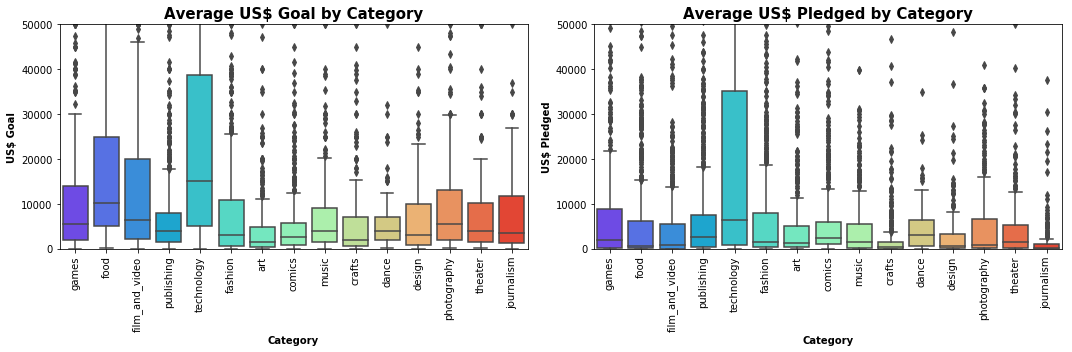

In [34]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
ax = plt.subplot(121)
ax = sns.boxplot(x='category_main',y='usd_goal',data=df,palette='rainbow')
ax.set_ylim([0, 50000]) 
ax.set_xlabel("Category",fontweight='bold')
ax.set_ylabel("US$ Goal",fontweight='bold')
# ax.set_xticklabels(rotation=45)
plt.xticks(rotation=90)

plt.title("Average US$ Goal by Category",fontweight='bold',fontsize=15)

ax = plt.subplot(122)
ax = sns.boxplot(x='category_main',y='usd_pledged',data=df,palette='rainbow')
ax.set_ylim([0, 50000]) 
ax.set_xlabel("Category",fontweight='bold')
ax.set_ylabel("US$ Pledged",fontweight='bold')
# ax.set_xticklabels(rotation=45)
plt.xticks(rotation=90)

plt.title("Average US$ Pledged by Category",fontweight='bold',fontsize=15)
plt.tight_layout()
plt.savefig("../charts/goalpledgedcategory.png")

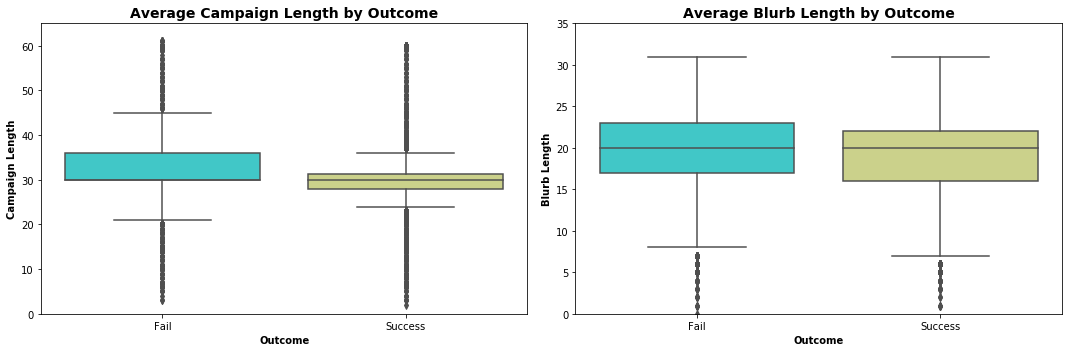

In [36]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
ax = plt.subplot(121)
ax = sns.boxplot(x='state',y='campaign_length',data=df,palette='rainbow')
ax.set_ylim([0, 65]) 
ax.set_xlabel("Outcome",fontweight='bold')
ax.set_ylabel("Campaign Length",fontweight='bold')
ax.set_xticklabels(['Fail','Success'])
plt.title("Average Campaign Length by Outcome",fontweight='bold',fontsize=14)

ax = plt.subplot(122)
ax = sns.boxplot(x='state',y='blurb_length',data=df,palette='rainbow')
ax.set_ylim([0, 35]) 
ax.set_xlabel("Outcome",fontweight='bold')
ax.set_ylabel("Blurb Length",fontweight='bold')
ax.set_xticklabels(['Fail','Success'])
plt.title("Average Blurb Length by Outcome",fontweight='bold',fontsize=14)
plt.tight_layout()
plt.savefig("../charts/campaignblurblengthstate.png")

Text(0,0.5,'Frequency')

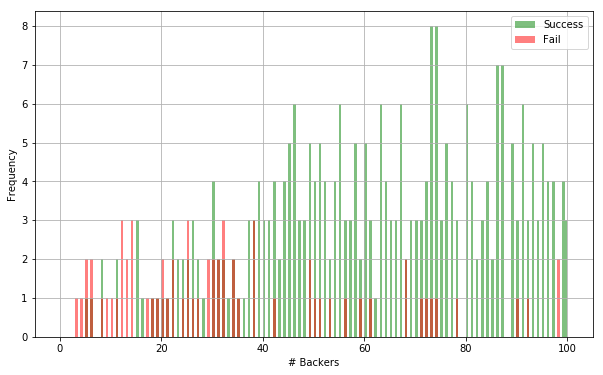

In [37]:
plt.figure(figsize=(10,6))

df[(df['state'] == 1) & (df['staff_pick'] ==1)]['backers_count'].hist(range=(0,100), alpha=0.5,color='g',
                                              bins=200,label='Success')
df[(df['state'] == 0) & (df['staff_pick'] ==1)]['backers_count'].hist(range=(0,100), alpha=0.5,color='r',
                                              bins=200,label='Fail')
plt.legend()
plt.xlabel('# Backers')
plt.ylabel('Frequency')

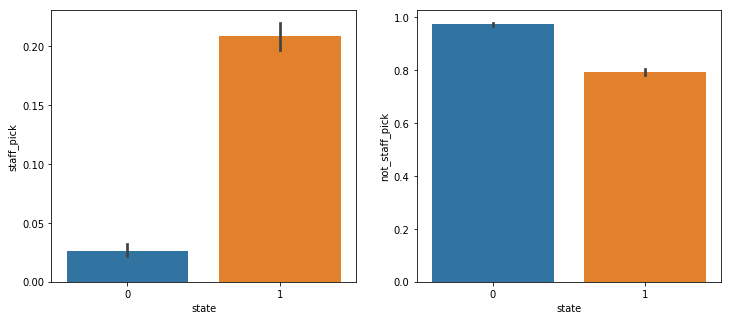

In [38]:
df['not_staff_pick'] = df['staff_pick'].replace({0:1,1:0})

fig,ax = plt.subplots(1,2,figsize=(12,5))
ax = plt.subplot(121)
ax = sns.barplot(x='state',y='staff_pick', data=df)

ax = plt.subplot(122)
ax = sns.barplot(x='state',y='not_staff_pick', data=df)

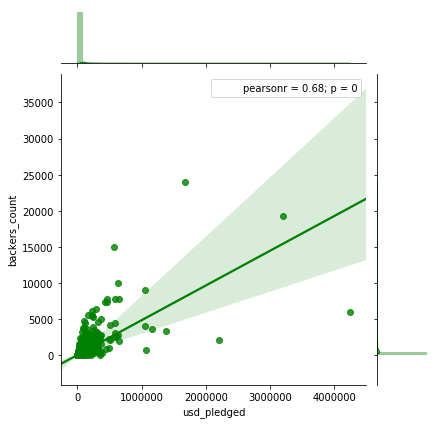

In [39]:
sns.jointplot(x='usd_pledged',y='backers_count', color='g',data=df, kind='reg')

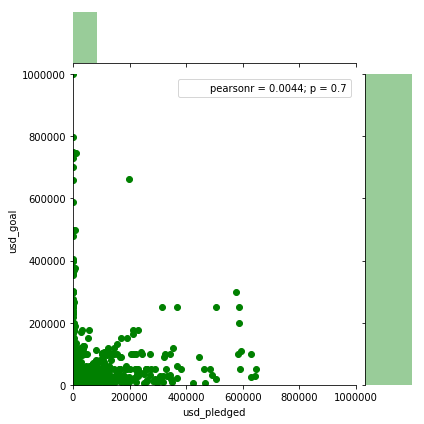

In [40]:
sns.jointplot(x='usd_pledged',y='usd_goal', xlim=(0,1000000),ylim=(0,1000000),color='g',data=df)

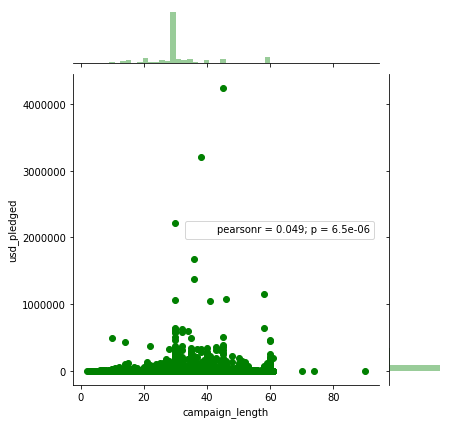

In [41]:
sns.jointplot(x='campaign_length',y='usd_pledged', color='g',data=df)

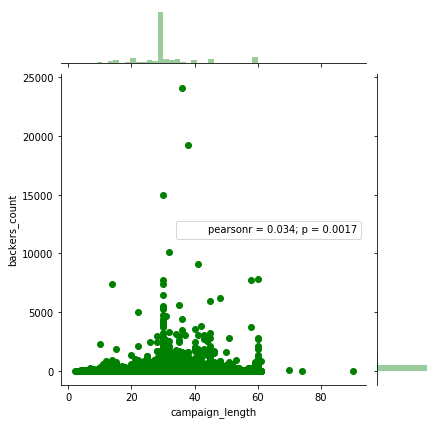

In [42]:
sns.jointplot(x='campaign_length',y='backers_count', color='g',data=df)

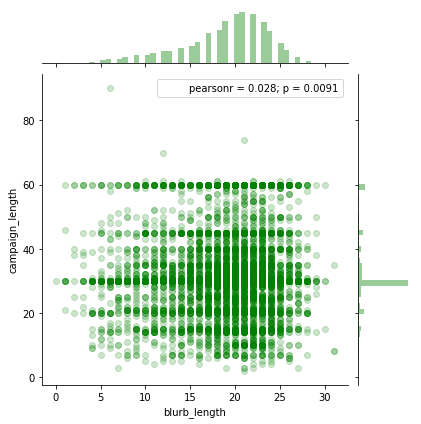

In [43]:
sns.jointplot(x='blurb_length',y='campaign_length',alpha=0.2, color='g',data=df)

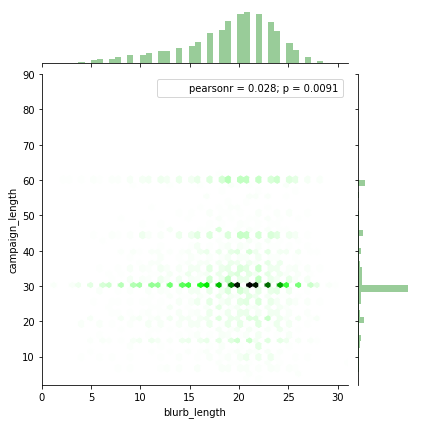

In [44]:
sns.jointplot(x='blurb_length',y='campaign_length',kind='hex',color='g',data=df)

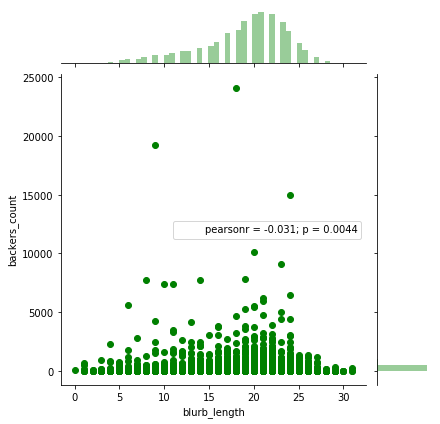

In [45]:
sns.jointplot(x='blurb_length',y='backers_count',color='g', data=df)

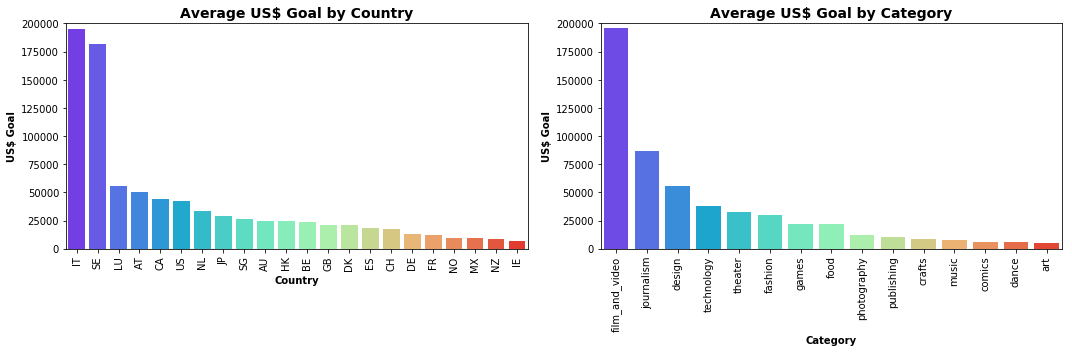

In [47]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
ax = plt.subplot(121)
cd_2 = cd.sort_values(['goal_mean'], ascending=[False])
ax = sns.barplot(x='country',y='goal_mean',data=cd_2,palette='rainbow')
ax.set_ylim([0, 200000]) 
ax.set_xlabel("Country",fontweight='bold')
ax.set_ylabel("US$ Goal",fontweight='bold')
plt.xticks(rotation=90)
plt.title("Average US$ Goal by Country",fontweight='bold',fontsize=14)

ax = plt.subplot(122)
mcd_2 = mcd.sort_values(['goal_mean'], ascending=[False])
ax = sns.barplot(x='category',y='goal_mean',data=mcd_2,palette='rainbow')
ax.set_ylim([0, 200000]) 
ax.set_xlabel("Category",fontweight='bold')
ax.set_ylabel("US$ Goal",fontweight='bold')
plt.xticks(rotation=90)
plt.title("Average US$ Goal by Category",fontweight='bold',fontsize=14)

plt.tight_layout()
plt.savefig("../charts/goalcountrycategory.png")

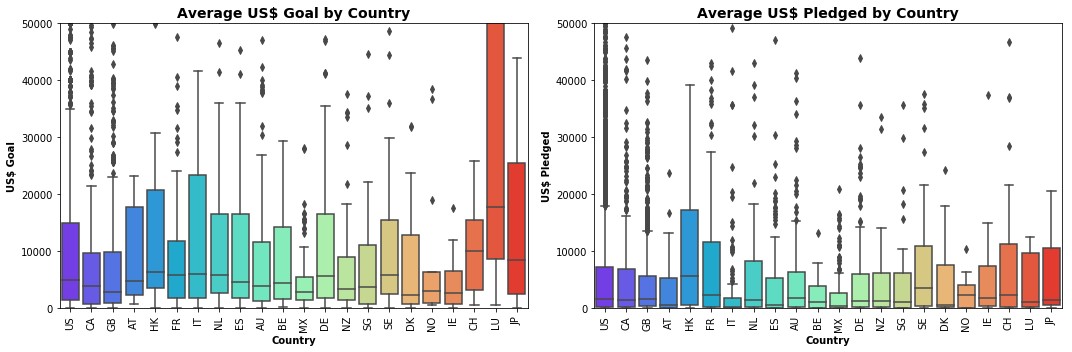

In [48]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
ax = plt.subplot(121)
ax = sns.boxplot(x='country',y='usd_goal',data=df,palette='rainbow')
ax.set_ylim([0, 50000]) 
ax.set_xlabel("Country",fontweight='bold')
ax.set_ylabel("US$ Goal",fontweight='bold')
plt.xticks(rotation=90)

plt.title("Average US$ Goal by Country",fontweight='bold',fontsize=14)

ax = plt.subplot(122)
ax = sns.boxplot(x='country',y='usd_pledged',data=df,palette='rainbow')
ax.set_ylim([0, 50000]) 
ax.set_xlabel("Country",fontweight='bold')
ax.set_ylabel("US$ Pledged",fontweight='bold')
plt.xticks(rotation=90)

plt.title("Average US$ Pledged by Country",fontweight='bold',fontsize=14)
plt.tight_layout()
plt.savefig("../charts/goalpledgedcountry.png")

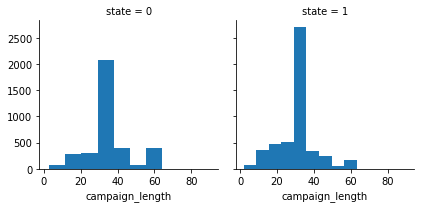

In [49]:
g = sns.FacetGrid(df,col='state')
g.map(plt.hist,'campaign_length')

(0, 60000)

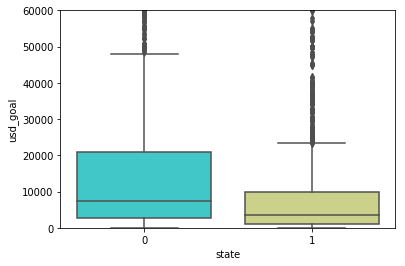

In [50]:
ax = sns.boxplot(x='state',y='usd_goal',data=df,palette='rainbow')
ax.set_ylim([0, 60000])  

(0, 40000)

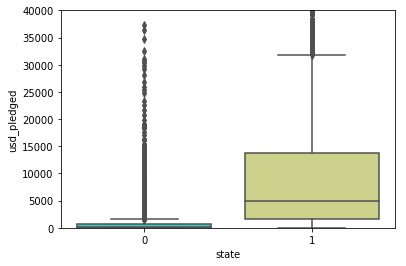

In [51]:
ax = sns.boxplot(x='state',y='usd_pledged',data=df,palette='rainbow')
ax.set_ylim([0, 40000])  

In [52]:
# ax = sns.boxplot(x='state',y='backers_count',data=df,palette='rainbow')
# ax.set_ylim([400, 1000])  

(0, 50000)

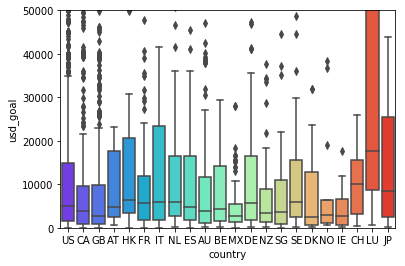

In [53]:
ax = sns.boxplot(x='country',y='usd_goal',data=df,palette='rainbow')
ax.set_ylim([0, 50000]) 

(0, 40000)

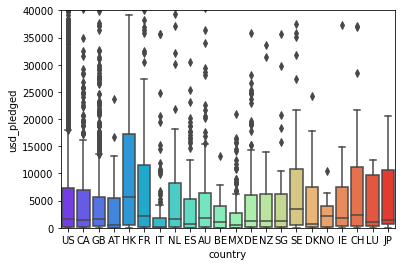

In [54]:
ax = sns.boxplot(x='country',y='usd_pledged',data=df,palette='rainbow')
ax.set_ylim([0, 40000]) 

(0, 1000)

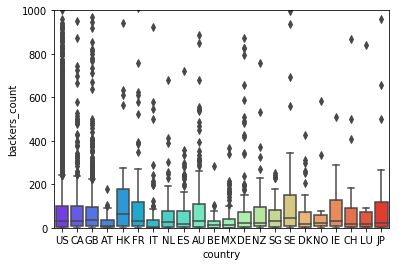

In [55]:
ax = sns.boxplot(x='country',y='backers_count',data=df,palette='rainbow')
ax.set_ylim([0, 1000]) 

(0, 60000)

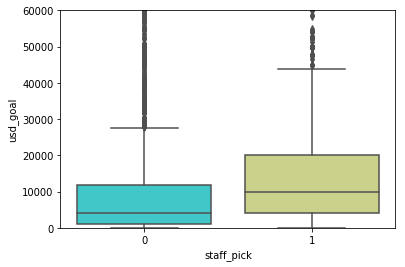

In [56]:
ax = sns.boxplot(x='staff_pick',y='usd_goal',data=df,palette='rainbow')
ax.set_ylim([0, 60000])  

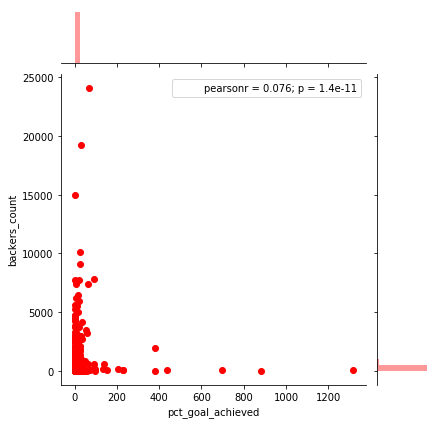

In [57]:
sns.jointplot(x='pct_goal_achieved',y='backers_count',data=df,color='red');

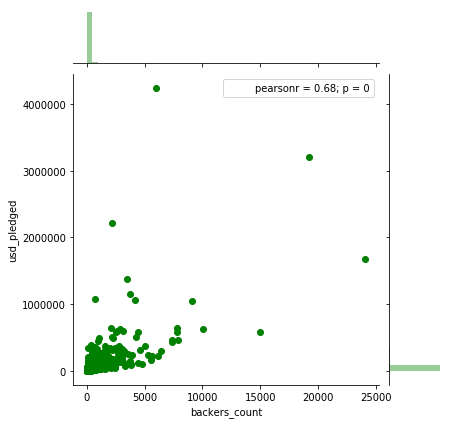

In [58]:
sns.jointplot(x='backers_count',y='usd_pledged',data=df,color='green')

Text(0,0.5,'Frequency')

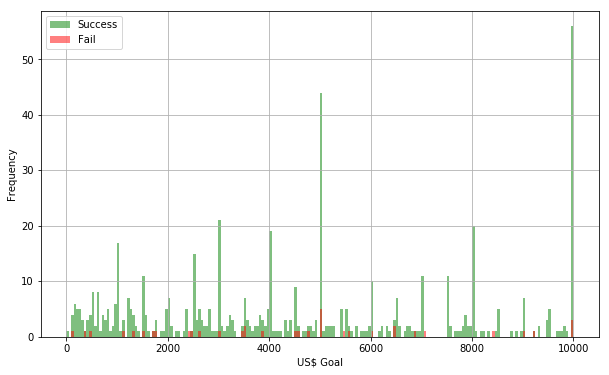

In [59]:
plt.figure(figsize=(10,6))

df[(df['state'] == 1) & (df['staff_pick'] ==1)]['usd_goal'].hist(range=(0,10000), alpha=0.5,color='g',
                                              bins=200,label='Success')
df[(df['state'] == 0) & (df['staff_pick'] ==1)]['usd_goal'].hist(range=(0,10000), alpha=0.5,color='r',
                                              bins=200,label='Fail')
plt.legend()
plt.xlabel('US$ Goal')
plt.ylabel('Frequency')

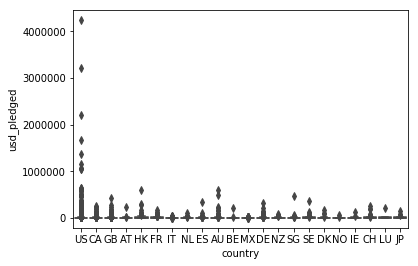

In [60]:
sns.boxplot(x="country",y="usd_pledged",data=df)

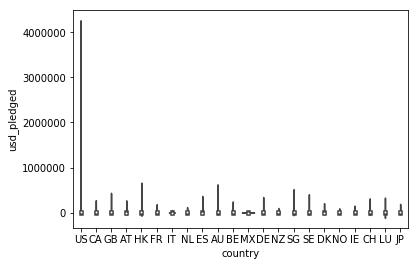

In [61]:
sns.violinplot(x='country', y='usd_pledged', data=df)

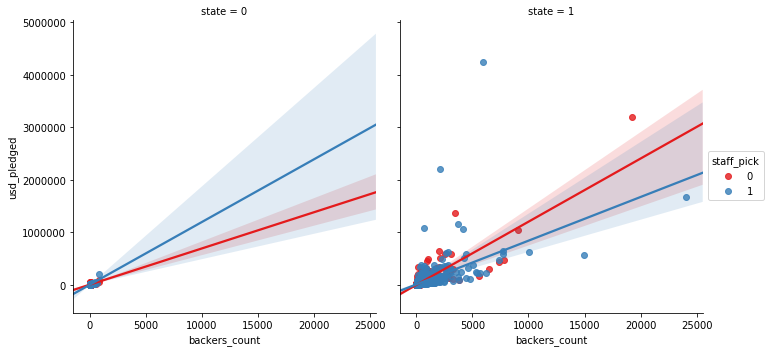

In [62]:
plt.figure(figsize=(11,7))
sns.lmplot(y='usd_pledged',x='backers_count',data=df,hue='staff_pick',
           col='state',palette='Set1')

Text(0,0.5,'Frequency')

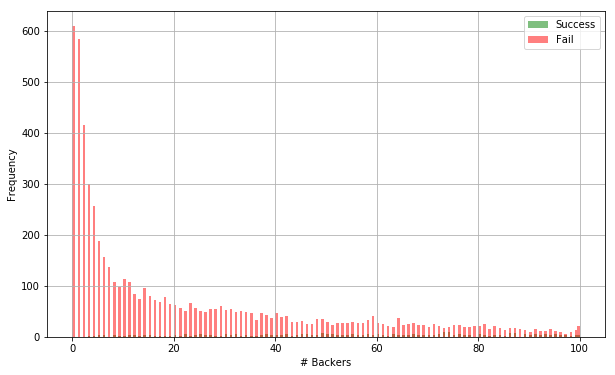

In [63]:
plt.figure(figsize=(10,6))
df[df['staff_pick']==1]['backers_count'].hist(range=(0,100), alpha=0.5,color='g',
                                              bins=200,label='Success')
df[df['staff_pick']==0]['backers_count'].hist(range=(0,100), alpha=0.5,color='r',
                                              bins=200,label='Fail')
plt.legend()
plt.xlabel('# Backers')
plt.ylabel('Frequency')

Text(0,0.5,'Frequency')

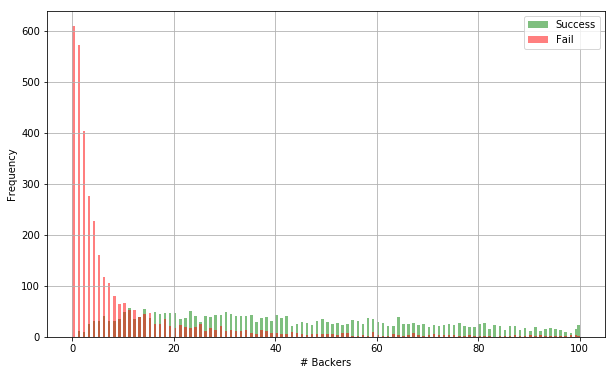

In [64]:
plt.figure(figsize=(10,6))
df[df['state']==1]['backers_count'].hist(range=(0,100), alpha=0.5,color='g',
                                              bins=200,label='Success')
df[df['state']==0]['backers_count'].hist(range=(0,100), alpha=0.5,color='r',
                                              bins=200,label='Fail')
plt.legend()
plt.xlabel('# Backers')
plt.ylabel('Frequency')

Text(0,0.5,'Frequency')

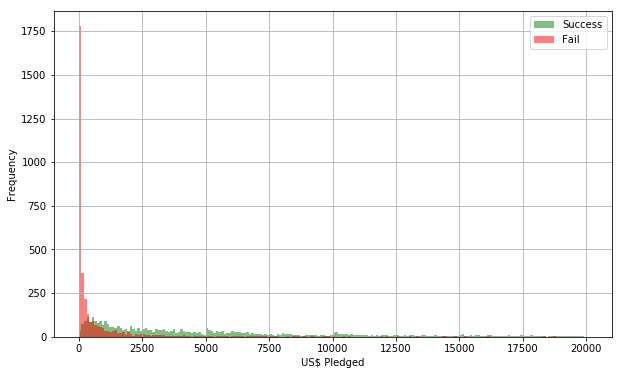

In [65]:
plt.figure(figsize=(10,6))
df[df['state']==1]['usd_pledged'].hist(range=(0,20000), alpha=0.5,color='g',
                                              bins=200,label='Success')
df[df['state']==0]['usd_pledged'].hist(range=(0,20000), alpha=0.5,color='r',
                                              bins=200,label='Fail')
plt.legend()
plt.xlabel('US$ Pledged')
plt.ylabel('Frequency')

Text(0,0.5,'Frequency')

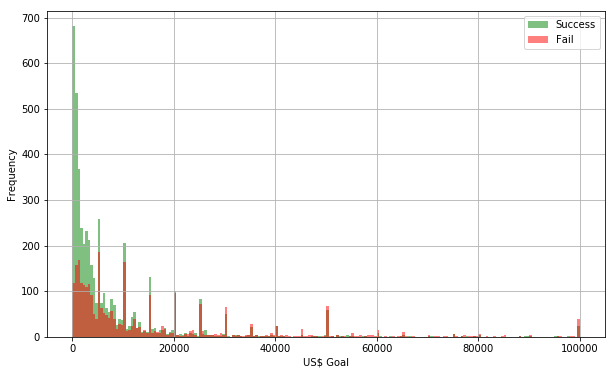

In [66]:
plt.figure(figsize=(10,6))
df[df['state']==1]['usd_goal'].hist(range=(0,100000), alpha=0.5,color='g',
                                              bins=200,label='Success')
df[df['state']==0]['usd_goal'].hist(range=(0,100000), alpha=0.5,color='r',
                                              bins=200,label='Fail')
plt.legend()
plt.xlabel('US$ Goal')
plt.ylabel('Frequency')

(2, 2)


Text(0,0.5,'Number of Campaigns')

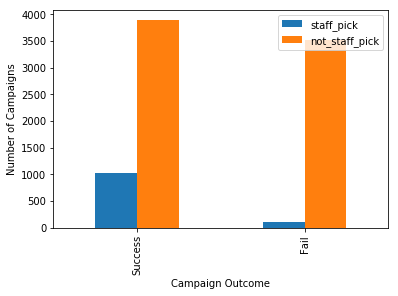

In [67]:
df['not_staff_pick'] = df['staff_pick'].replace({0: 1, 1:0})
df['state'] = df['state'].replace({0: "Fail", 1:"Success"})
df_staff_pick = df.groupby(["state"]).sum().sort_values(['staff_pick'], ascending=[False])
df_staff_pick = pd.DataFrame(df_staff_pick, columns={'staff_pick','not_staff_pick'})
print(df_staff_pick.shape)
df_staff_pick.plot(kind='bar')
plt.xlabel('Campaign Outcome')
plt.ylabel('Number of Campaigns')

In [68]:
df_state = df.groupby(["state"]).count().sort_values(['name'], ascending=[False])
df_state = pd.DataFrame(df_state, columns={'name'})
print(df_state.shape)
df_state

(2, 1)


name
state        
Success  4904
Fail     3620

(22, 2)


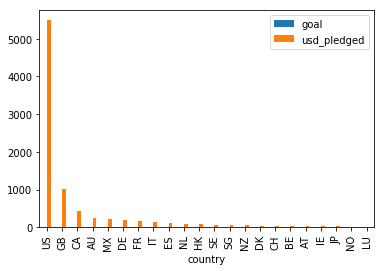

In [69]:
df_state = df.groupby(["country"]).count().sort_values(['state'], ascending=[False])
df_state = pd.DataFrame(df_state, columns={'usd_pledged','goal'})
print(df_state.shape)
df_state.plot(kind='bar')

(2, 2)


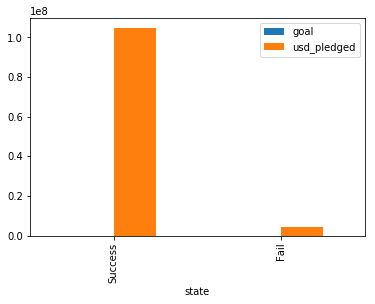

In [70]:
df_state = df.groupby(["state"]).sum().sort_values(['usd_pledged'], ascending=[False])
df_state = pd.DataFrame(df_state, columns={'usd_pledged','goal'})
print(df_state.shape)
df_state.plot(kind='bar')

(2, 1)


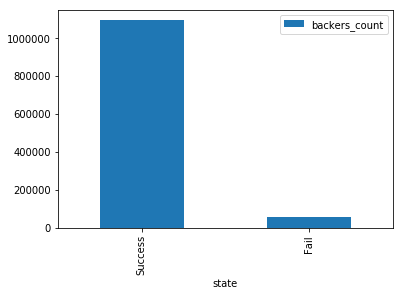

In [71]:
df_state = df.groupby(["state"]).sum().sort_values(['backers_count'], ascending=[False])
df_state = pd.DataFrame(df_state, columns={'backers_count'})
print(df_state.shape)
df_state.plot(kind='bar')